# ¿Que juegos son mas exitosos?

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027 en función de los datos de 2026.

El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego. El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente o Adulto.

# Paso 1. Inicializacion

Cargar librerias que vamos a utilizar.

In [ ]:
# Cargar librerias
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

## Cargar datos

Cargar los datasets y examinarlos.

In [ ]:
# Abrir archivo de datos
games = pd.read_csv('/datasets/games.csv')

Visualizar y examinar las columnas y los datos.

In [3]:
# Examinar informacion del dataframe
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# Imprimir muestra de los datos
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Usamos el metodo describe() para ver estadisticas generales de de todas las columnas numericas.

In [5]:
# Mostrar estadisticas generales
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Observaciones iniciales

Varias columnas contienen valores ausentes como 'year_of_release', 'critic_score', 'user_score' y 'rating'.

Hay algunas columnas podrian convertirse a un tipo mas adecuado. Por ejemplo 'year_of _release' esta como tipo float, cuando lo mas correcto seria que fuera tipo int (numero entero). La columna 'user_score' en cambio podria convertise a float pues contiene numeros con punto decimal. Sin embargo ninguna de esas columnas puede convertise porque contienen valores ausentes que impiden la conversion de la columna completa.

# Paso 2. Preparar y Limpiar datos

Preparar la limpieza de datos y estandarizacion. 

In [6]:
# Convertir nombres de columnas a minusculas
games.columns = games.columns.str.lower().str.strip()

# Mostrar nombres de columnas estandarizadas
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## Procesar duplicados

Vamos a buscar duplicados. Debido a la naturaleza del dataset, los duplicados importantes que podriamos encontrarnos serian nombres de titulos repetidos en la misma plataforma, esto debido a que un mismo titulo puede lanzarse simultaneamente para varias plataformas, Playstation, Xbox, PC, etc. Por lo tanto tenemos que buscar duplicados por nombre y plataforma y posiblemente por año de lanzamiento. 

In [7]:
# Buscar filas completas duplicadas
print(f'Filas completas duplicadas: {games.duplicated().sum()}')
print()
print('Filas con nombres duplicados: \n')
games[games.duplicated('name')]

Filas completas duplicadas: 0

Filas con nombres duplicados: 



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


OBSERVACIONES

Como mencionamos anteriormente, aparecen 5155 nombres de titulos duplicados pues un mismo titulo puede ser lanzado en varias plataformas simultaneamente. Por lo tanto debemos buscar duplicados de forma mas explicita, por ejemplo, por nombre y plataforma.

In [8]:
# Buscar y corregir datos repetidos en columnas 'name' y 'platform'
games[games.duplicated(['name', 'platform'], keep=False)].sort_values('name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


OBSERVACIONES

De esta forma encontramos que solo hay unos pocos titulos que en efecto son duplicados. Debemos ser cuidadosos al momento de procesar o eliminar los duplicados, pues lo mas conveniente seria mantener los titulos que registran mayores ventas.

Nota posterior: Despues de realizar una pequeña investigacion sobre cada uno de estos titulos encontramos que Need for Speed Most Wanted 2005 es una version diferente de Need for Speed Most Wanted 2012, por lo tanto debemos descartar que son duplicados y evitar eliminar esos titulos.

En el caso de Madden NFL 13 y Sonic the Hedgehog si parecen ser duplicados implicitos.

Los titulos finales de los cuales se desconoce su nombre y genero tambien es probable que sean el mismo pues fueron lanzados para la misma plataforma y el mismo año. Estos titulos desconocidos nos proporcionan poca infomacion mas alla de sus ventas y en realidad podrian considerarse valores anomalos que realmente no afectarian en gran medida a un analisis estadistico si los mantenemos o no. Por lo tanto hemos decidido eliminar estos titulos desconocidos con el fin de tener datos limpios, claros y relevantes.

In [9]:
# Eliminar duplicados implicitos y guardar en una variable
games_limpios = games.drop([16230, 4127, 659, 14244])

## Procesar valores ausentes

Anteriormente, con el metodo info() descubrimos que las columnas critic_score, user_score y rating presentan un alto numero de valores ausentes. Por lo que vamos a realizan un pequeño analisis para conocer el porcentaje de valores ausentes en esas columnas y decidir que haremos con ellos.

In [10]:
# Calculamos los valores ausentes y los guardamos en una variable
ausentes = games.isna().sum().reset_index()

In [11]:
# Creamos una dataframe con las columnas: 'columna' y 'num_ausentes'
ausentes.columns = ['columna', 'num_ausentes']

In [12]:
# Creamos una nueva columna que calcule el porcentaje de valores ausentes
ausentes['%_ausentes'] = (ausentes['num_ausentes'] / games_limpios.shape[0]) * 100

In [13]:
# Mostrar informacion
ausentes.sort_values('num_ausentes', ascending=False)

,columna,num_ausentes,%_ausentes
8,critic_score,8578,51.331458
10,rating,6766,40.488301
9,user_score,6701,40.099336
2,year_of_release,269,1.609718
0,name,2,0.011968
3,genre,2,0.011968
1,platform,0,0.000000
4,na_sales,0,0.000000
5,eu_sales,0,0.000000
6,jp_sales,0,0.000000


OBSERVACIONES

La columna critic_score presenta un 51% de valores ausentes, mientras que las columnas rating y user_score poco mas de 40%. En el caso de la columna 'rating' podemos reemplazar los valores ausentes con las siglas RP (Rating Pending) que es la etiqueta que utiliza la ESRB cuando algun titulo aun no ha sido catalogado o clasificado.

En el caso de las otras columnas, que son puntajes numericos podriamos pensar en reemplazar con la media o la mediana, pero al ser un alto porcentaje de datos tambien estariamos afectando directamente los analisis posteriores por lo que no seria adecuado. De hacerlo estariamos sesgando o maquillando los analisis estadisticos posteriores. 

Por lo tanto vamos a dejar como ausentes esos datos de la columna 'critic_score' y 'user_score'.

In [14]:
# Modificar valores ausentes en columnas 'critic_score' y 'user_score'
games_limpios['critic_score'] = games_limpios['critic_score'].fillna(np.nan)
games_limpios['user_score'] = games_limpios['user_score'].fillna(np.nan)

In [15]:
# Verificar valores unicos en 'user_score'
games_limpios['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

In [16]:
# Funcion para limpiar los valores 'tbd'
def limpiar_tbd(fila):
    if fila == 'tbd':
        return np.nan
    return fila

In [17]:
# Aplicar funcion a la columna 'user_score'
games_limpios['user_score'] = games_limpios['user_score'].apply(limpiar_tbd)

# Cambiar columna 'user_score' a tipo float
games_limpios['user_score'] = games_limpios['user_score'].astype(float)

In [18]:
# Verificar valores unicos en 'rating'
games_limpios['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [19]:
# Rellenar valores ausentes con la etiqueta 'RP'
games_limpios['rating'] = games_limpios['rating'].fillna('RP')

In [20]:
# Verificar resultados
games_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           16711 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [21]:
# Procesar valores ausentes de columna 'year_of_release'
filtro_año_ausentes = games_limpios[games_limpios['year_of_release'].isna()]
filtro_año_ausentes

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,RP
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,RP
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,RP


OBSERVACIONES

En la columna 'year_of_release' existen 268 videojuegos que no tienen un año de lanzamiento especificado. Algunos de estos juegos podemos inferir que fueron lanzados durante cierto periodo dependiendo de la plataforma en que fueron lanzados. Por ejemplo los videojuegos que pertenecen a la plataforma Atari 2600, probablemente son del periodo de 1977-1986 aproximadamente, que fue el periodo de auge de esa plataforma. Una logica similar podriamos seguir con el resto de titulos que carecen de un año de lanzamiento especificado. Aun asi, no conocemos el dato exacto del año de lanzamiento de cada uno de estos juegos.

Debido a que nos interesa sobre todo un periodo historico mas actual para nuestro analisis, podriamos descartar aquellos titulos que pertenecen a plataformas mas antiguas, o anteriores al año 1990-1994.

Al ser una cantidad relativamente menor en comparacion con la cantidad total de datos (16711) quiza podriamos desahacernos de esas filas sin alterar mucho los resultados de analisis posteriores pues solo representan un 1.6% del total. Por tanto vamos a procesar esos valores ausente para tener datos lo mas limpios posible.

In [22]:
# Eliminar datos con valores ausentes en 'year_of_release' y guardar en nueva variable
games_limpios = games_limpios.dropna(subset=['year_of_release'])

In [23]:
# Cambiar tipo a entero
games_limpios['year_of_release'] = games_limpios['year_of_release'].astype(int)

# Verficar cambios
games_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


OBSERVACIONES

Finalmente tenemos un dataframe con 16443 datos, en su mayoria limpios. Sin embargo las columnas 'critic_score' y 'user_score' un porcentaje alto de valores ausentes. Hemos decidido no reemplazar o remover esos datos. La razon es que aun podemos trabajar esa cantidad de datos que son cerca del 50% para realizar analisis que tienen que ver con el 'critic_score' y 'user_score'. Es decir que, cuando toque realizar un analisis a partir los puntajes de critica y usuarios trabajaremos unicamente con los 7982 y 7462 datos disponibles que todavia representan una muestra estadistica significativa y podemos obtener resultados aproximados a la poblacion total de nuestros datos. Para todo lo demos utilizaremos los 16443 datos disponibles.

## Calcular las ventas totales

Calcula las ventas totales (la suma de las ventas en todas las regiones) para cada juego y coloca estos valores en una columna separada.

In [24]:
# Crear una nueva columna que calcule las ventas totales por titulo
games_limpios['ventas_totales'] = games_limpios['na_sales'] + games_limpios['eu_sales'] + games_limpios['jp_sales'] + games_limpios['other_sales']

In [25]:
# Mostrar la columna ventas_totales
games_limpios.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


# Paso 3. Analizar datos



## Juegos lanzados por año

Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?

In [26]:
# Conteo de juegos lanzados por año
games_by_year = games_limpios.groupby('year_of_release')['name'].count().reset_index()

In [27]:
# Renombrar columnas
games_by_year.columns = ['year', 'num_games_by_year']

# Imprimir resultado
games_by_year

,year,num_games_by_year
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


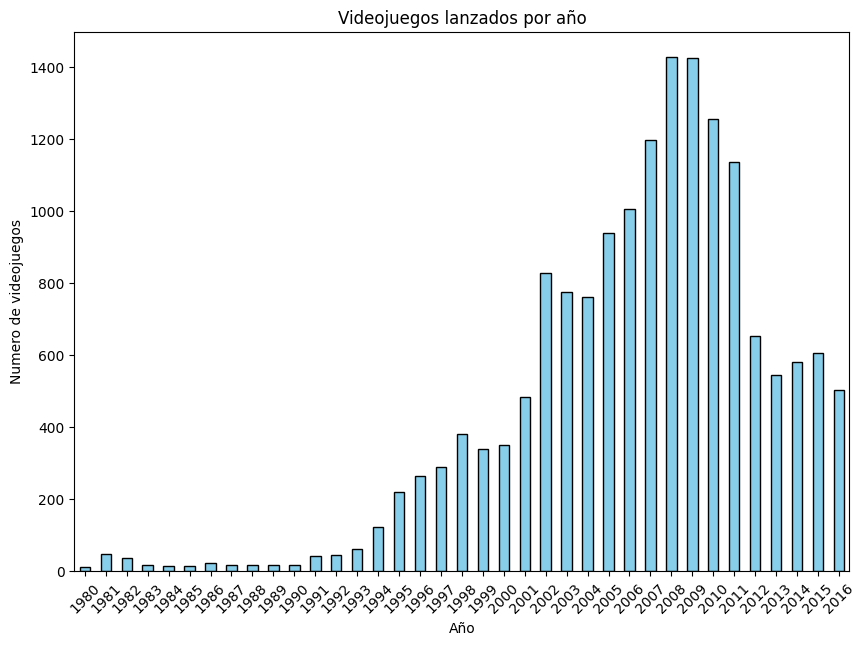

In [28]:
# Grafica de juegos lanzados por año
games_by_year.plot(title='Videojuegos lanzados por año', kind='bar', x='year', figsize=(10, 7), 
                   edgecolor='black', color='skyblue', legend=False, ylabel='Numero de videojuegos', xlabel='Año')
plt.xticks(rotation=45)
plt.show()

In [29]:
# Conteo de juegos vendidos por año
games_sold_by_year = games_limpios.groupby('year_of_release')['ventas_totales'].sum().reset_index()

#
games_sold_by_year.columns = ['year', 'ventas_totales'] 

# Mostrar resultado
games_sold_by_year

,year,ventas_totales
0,1980,11.38
1,1981,35.68
2,1982,28.88
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,37.08
7,1987,21.70
8,1988,47.21
9,1989,73.45


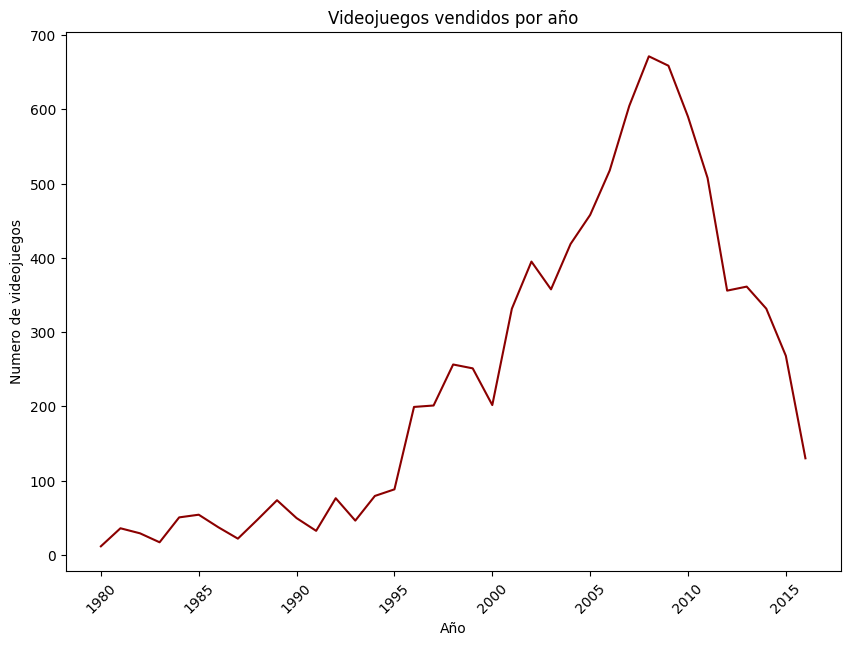

In [30]:
# Grafica de juegos vendidos por año
games_sold_by_year.plot(title='Videojuegos vendidos por año', kind='line', x='year', figsize=(10, 7), 
                   color='darkred', legend=False, ylabel='Numero de videojuegos', xlabel='Año')
plt.xticks(rotation=45)
plt.show()

OBSERVACIONES

Podemos observar como a partir de 1990 la cantidad de videojuegos lanzados por año fue incrementandose. De 1990 al 2000 hubo un incremento considerable, la industria del entretenimiento electronico estaba creciendo. Del año 2000 al 2010 tambien se registra un aumento significativo. Despues de 2011 la cantidad de videojuegos lanzados por año muestra un decenso, lo cual quiza se deba al tiempo requerido para producir videojuegos cada vez mas complejos.

## Venta de juegos por plataforma

Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [31]:
# Agrupar por plataforma y sumar ventas totales
games_by_platform = games_limpios.groupby(['platform'])['ventas_totales'].sum().reset_index()

In [32]:
# Renombrar columnas
games_by_platform.columns = ['platform', 'total_sales']

# Mostrar resultados
games_by_platform = games_by_platform.sort_values('total_sales', ascending=False)
print('Venta de juegos por plataforma (Top 25)')
games_by_platform.head(25)

Venta de juegos por plataforma (Top 25)


,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.33
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


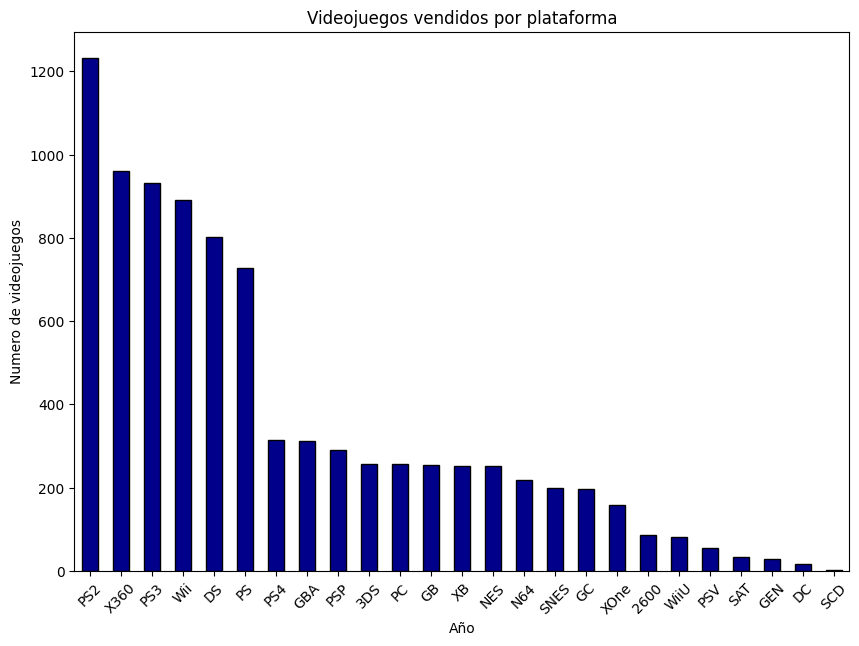

In [33]:
# Grafica de juegos vendidos por plataforma
games_by_platform.head(25).plot(title='Videojuegos vendidos por plataforma', kind='bar', x='platform', figsize=(10, 7), 
                   edgecolor='black', color='darkblue', legend=False, ylabel='Numero de videojuegos', xlabel='Año')
plt.xticks(rotation=45)
plt.show()

OBSERVACIONES 

La grafica anterior muestra que las primeras 6 plataformas han tenido un dominio en ventas de juegos muy superior al resto. El particular hay 3 plataformas de Playstation (PS, PS2 y PS3), el Xbox 360, Wii y DS (estas ultimas plataformas de Nintendo). Estas plataformas registraron ventas de juegos superiores a 700 millones. Otra observacion importante es que el periodo de vida de estas plataformas comprende aproximadamente desde 1994 (con la primer Playstation) hasta cerca de 2012. Esto es muestra una consistencia con la grafica anterior donde los años que registraron mas ventas de juegos, son precisamente entre este periodo de 1994-2012.

## Venta de juegos por plataforma y por año

In [34]:
# Agrupar por plataforma y año de lanzamiento
games_by_platform_and_year = games_limpios.groupby(['platform', 'year_of_release'])['ventas_totales'].sum().reset_index()

In [35]:
# Renombrar columnas y ordenar por ventas totales
games_by_platform_and_year.columns = ['platform', 'year', 'total_sales']
games_by_platform_and_year = games_by_platform_and_year.sort_values('year')

# Top 25
games_by_platform_and_year

,platform,year,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
77,NES,1983,10.96
...,...,...,...
156,PS4,2016,69.25
152,PS3,2016,3.60
17,3DS,2016,15.14
224,X360,2016,1.52


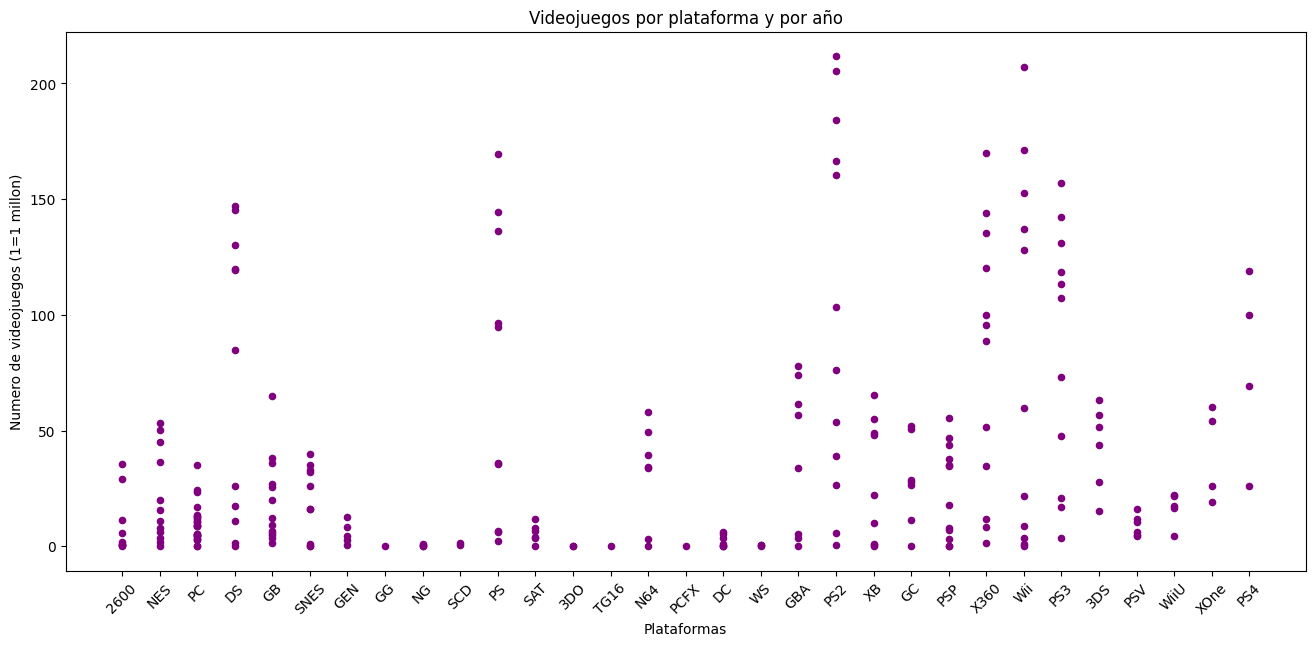

In [36]:
# Grafica de juegos por plataforma y por año
games_by_platform_and_year.plot(title='Videojuegos por plataforma y por año', kind='scatter', x='platform', y='total_sales', 
                                         figsize=(16, 7), color='purple', legend=False, 
                                         ylabel='Numero de videojuegos (1=1 millon)', xlabel='Plataformas')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Plataformas y ventas de juegos en 2013
games_by_platform_and_year[games_by_platform_and_year['year'] == 2013]

,platform,year,total_sales
14,3DS,2013,56.57
115,PC,2013,12.38
171,PSV,2013,10.59
209,WiiU,2013,21.65
166,PSP,2013,3.14
221,X360,2013,88.58
149,PS3,2013,113.25
234,XOne,2013,18.96
153,PS4,2013,25.99
204,Wii,2013,8.59


In [38]:
# Plataformas y ventas de juegos en 2014
games_by_platform_and_year[games_by_platform_and_year['year'] == 2014]

,platform,year,total_sales
205,Wii,2014,3.75
150,PS3,2014,47.76
15,3DS,2014,43.76
235,XOne,2014,54.07
210,WiiU,2014,22.03
167,PSP,2014,0.24
154,PS4,2014,100.00
172,PSV,2014,11.90
222,X360,2014,34.74
116,PC,2014,13.28


In [39]:
# Plataformas y ventas de juegos en 2015
games_by_platform_and_year[games_by_platform_and_year['year'] == 2015]

,platform,year,total_sales
223,X360,2015,11.96
236,XOne,2015,60.14
206,Wii,2015,1.14
16,3DS,2015,27.78
117,PC,2015,8.52
168,PSP,2015,0.12
155,PS4,2015,118.90
151,PS3,2015,16.82
211,WiiU,2015,16.35
173,PSV,2015,6.25


In [40]:
# Plataformas y ventas de juegos en 2016
games_by_platform_and_year[games_by_platform_and_year['year'] == 2016]

,platform,year,total_sales
118,PC,2016,5.25
212,WiiU,2016,4.60
207,Wii,2016,0.18
174,PSV,2016,4.25
156,PS4,2016,69.25
152,PS3,2016,3.60
17,3DS,2016,15.14
224,X360,2016,1.52
237,XOne,2016,26.15


In [41]:
# Plataformas y ventas de juegos a partir de 2013 hasta 2016
games_by_platform_and_year[games_by_platform_and_year['year'] > 2012]

,platform,year,total_sales
14,3DS,2013,56.57
115,PC,2013,12.38
171,PSV,2013,10.59
209,WiiU,2013,21.65
166,PSP,2013,3.14
221,X360,2013,88.58
149,PS3,2013,113.25
234,XOne,2013,18.96
153,PS4,2013,25.99
204,Wii,2013,8.59


OBSERVACIONES

De manera general, el periodo de vida de una plataforma o consola de videojuegos es de 5 a 7 años. Sin embargo ciertas plataformas con altas ventas en su periodo de auge continuan generando ventas de titulos debido a su popularidad inicial. Desde 1994 con el lanzamiento del primer Playstation, esta marca se ha mantenido como la mas popular hasta 2016, seguido de otras plataformas como Xbox y las consolas de Nintendo.

## Modelo para 2017

CONSIDERACIONES 

En los 2 ultimos años previos a 2017, las plataformas que mantienen un dominio en ventas de videojuegos son principalmente PS4, Xbox One y Nintendo 3DS. Mas abajo y con un margen significativo respecto de las primeras 3 plataformas, se encuentran otras como PS3, Xbox 360, Wii U y PC. Durante estos 2 ultimos años previos a 2017, la tendencia es que las plataformas PS4, Xbox One y 3DS se mantienen con ventas considerables, mientras que el resto de plataformas tienen a disminuir sus ventas conforme pasa el tiempo y se hacen menos relevantes que las plataformas mas modernas.

Considerando la tendencia de años anteriores, podemos predecir con cierta seguridad que publicar en las plataformas PS4, Xbox One, 3DS y PC seria mas rentable que publicar en PS3, Xbox 360 o Wii, ya que son plataformas mas antiguas que van de salida.

## Ventas globales de todos los juegos

Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

In [42]:
# Ventas glabales de juegos por plataforma
total_sales_by_platform = games_limpios.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).reset_index()

# Top 10
print('Top 10 Plataformas de ventas de videojuegos')
total_sales_by_platform.head(10)

Top 10 Plataformas de ventas de videojuegos


,platform,ventas_totales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.33
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [59]:
total_sales_by_platform.head(10)['platform'].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [51]:
games_limpios['platform']

0         Wii
1         NES
2         Wii
3         Wii
4          GB
         ... 
16710     PS3
16711    X360
16712     PSV
16713     GBA
16714     PSV
Name: platform, Length: 16443, dtype: object

In [44]:
# Diagrama de caja para ventas por plataforma
# 
plt.figure(figsize=(12, 8))
# filter_top_platforms.boxplot(column='ventas_totales', by='platform', figsize=(12, 8))

# plt.title('Distribución de Ventas Globales por Plataforma')
# plt.suptitle('')
# plt.ylabel('Ventas Globales (1 = 1 millon)')
# plt.xlabel('Plataforma')
# plt.xticks(rotation=45)
# plt.show()

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [45]:
# Calcular estadísticas por plataforma
estadisticas = filter_top_platforms.groupby('platform')['ventas_totales'].agg([
    'count',    # Número de juegos
    'mean',     # Promedio
    'median',   # Mediana
    'std',      # Desviación estándar
    'min',      # Mínimo
    'max'       # Máximo
]).round(2)

print("Estadísticas por plataforma:")
print(estadisticas)

Estadísticas por plataforma:
Empty DataFrame
Columns: [count, mean, median, std, min, max]
Index: []


In [46]:
filter_top_platforms

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales


## Reseñas de usuarios

Para esta seccion del analisis vamos a trabajar a partir de las columnas critic y user score. Vamos a trabajar con datos completos y limpios, por lo que para ello vamos a sacar los valores ausentes y trabajar los datos como si fueran un muestra significativa del total de datos que serian como la poblacion.

In [60]:
# Crear una variable que almacene los datos completos de critic y user score
muestra_games_limpios = games_limpios.dropna(subset=['critic_score', 'user_score'])

# Verficar cantidad de datos ausentes
muestra_games_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6893 entries, 0 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6893 non-null   object 
 1   platform         6893 non-null   object 
 2   year_of_release  6893 non-null   int64  
 3   genre            6893 non-null   object 
 4   na_sales         6893 non-null   float64
 5   eu_sales         6893 non-null   float64
 6   jp_sales         6893 non-null   float64
 7   other_sales      6893 non-null   float64
 8   critic_score     6893 non-null   float64
 9   user_score       6893 non-null   float64
 10  rating           6893 non-null   object 
 11  ventas_totales   6893 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 700.1+ KB


In [61]:
# Agrupar por plataforma y sumar ventas totales
sales_groupby_platform = muestra_games_limpios.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False).reset_index()
sales_groupby_platform

,platform,ventas_totales
0,PS2,946.01
1,X360,853.67
2,PS3,785.43
3,Wii,659.23
4,DS,382.88
5,PS4,244.27
6,XB,212.22
7,PS,209.98
8,PC,189.85
9,PSP,187.68


OBSERVACIONES

A pesar de estar trabajando con una cantidad de datos menor (6893 datos) la tabla anterior muestra una consistencia con las estadisticas de los datos completos. Las mismas plataformas se ubican en el tope de ventas.

In [62]:
# Agrupar por plataforma y calcular el promedio de critic score por plataforma
groupby_critic_score = muestra_games_limpios.groupby('platform')['critic_score'].mean().sort_values(ascending=False).reset_index()
groupby_critic_score.columns = ['platform', 'avg_critic_score']

In [63]:
# Mostrar resultados
groupby_critic_score

,platform,avg_critic_score
0,DC,87.357143
1,PC,75.965116
2,PS,74.150327
3,XOne,73.618182
4,PS4,72.132530
5,XB,71.565371
6,GC,71.204023
7,PS3,70.891473
8,PSV,70.737288
9,WiiU,70.674157


In [64]:
# Agrupar por plataforma y calcular el promedio de user score para cada plataforma
groupby_user_score = muestra_games_limpios.groupby('platform')['user_score'].mean().sort_values(ascending=False).reset_index()
groupby_user_score.columns = ['platform', 'avg_user_score']

In [65]:
# Mostrar resultados
groupby_user_score

,platform,avg_user_score
0,DC,8.528571
1,PS,7.877124
2,GBA,7.691983
3,PS2,7.664386
4,GC,7.616667
5,XB,7.535159
6,PSV,7.491525
7,PSP,7.270513
8,DS,7.044946
9,PC,7.043023


In [66]:
# Unir dataframes con merge
platforms_sales_critic_scores = sales_groupby_platform.merge(groupby_critic_score, on='platform')

In [67]:
platforms_sales_critic_scores = platforms_sales_critic_scores.merge(groupby_user_score, on='platform')

In [68]:
# Mostrar resultados
platforms_sales_critic_scores

,platform,ventas_totales,avg_critic_score,avg_user_score
0,PS2,946.01,69.492105,7.664386
1,X360,853.67,69.080139,6.785830
2,PS3,785.43,70.891473,6.789922
3,Wii,659.23,64.164583,6.905833
4,DS,382.88,66.531183,7.044946
5,PS4,244.27,72.132530,6.749799
6,XB,212.22,71.565371,7.535159
7,PS,209.98,74.150327,7.877124
8,PC,189.85,75.965116,7.043023
9,PSP,187.68,68.797436,7.270513


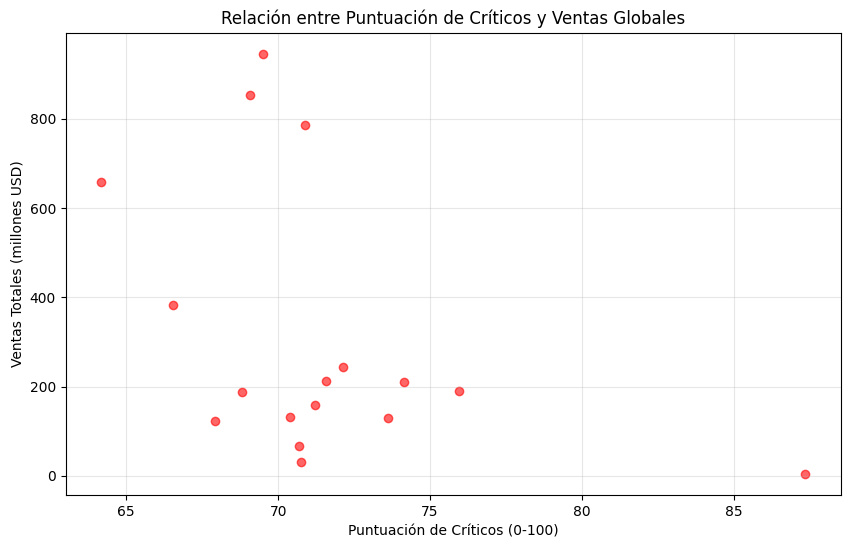

In [69]:
# Grafico de dispersion: Puntuacion critica vs. Ventas totales
plt.figure(figsize=(10, 6))
plt.scatter(platforms_sales_critic_scores['avg_critic_score'], platforms_sales_critic_scores['ventas_totales'], 
           alpha=0.6, color='red')
plt.xlabel('Puntuación de Críticos (0-100)')
plt.ylabel('Ventas Totales (millones USD)')
plt.title('Relación entre Puntuación de Críticos y Ventas Globales')
plt.grid(True, alpha=0.3)
plt.show()

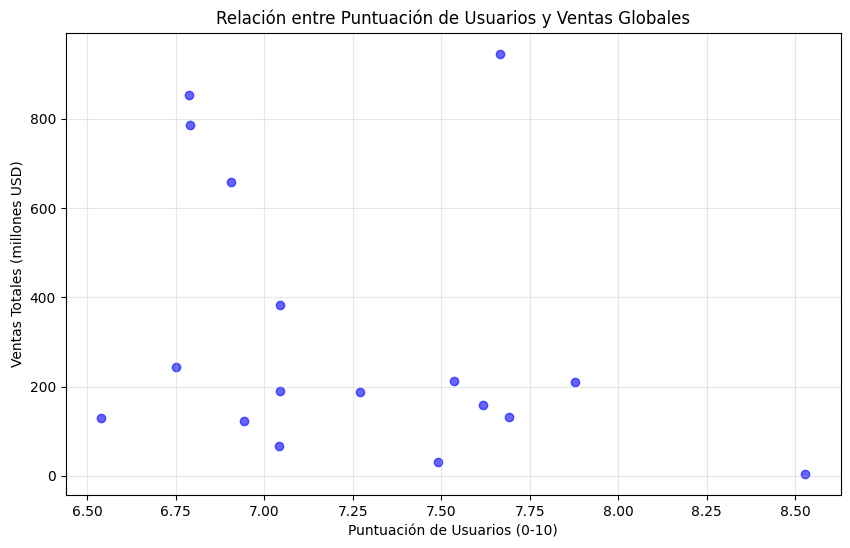

In [70]:
# Grafico de dispersion: Puntuacion de usuarios vs. Ventas totales
plt.figure(figsize=(10, 6))
plt.scatter(platforms_sales_critic_scores['avg_user_score'], platforms_sales_critic_scores['ventas_totales'], 
           alpha=0.6, color='blue')
plt.xlabel('Puntuación de Usuarios (0-10)')
plt.ylabel('Ventas Totales (millones USD)')
plt.title('Relación entre Puntuación de Usuarios y Ventas Globales')
plt.grid(True, alpha=0.3)
plt.show()

OBSERVACIONES 

Luego filtrar unicamente los titulos que tienen un critic y user score, podemos observar lo siguiente. No parece haber una correlacion directa entre la puntuacion promedio de una plataforma y su popularidad en ventas de videojuegos. Las plataformas con mayor puntuacion de la critica son: DreamCast (DC), Playstation One (PS) y PC. Mientras que las mayores puntuaciones por usuarios son: DreamCast (DC), Playstation One (PS) y GameBoy Advance (GBA). Y por otro lado, las consolas mas populares en terminos de ventas de videojuegos totales son: Playstation 2 (PS2), Xbox 360 (X360) y Playstation 3 (PS3). Por lo tanto no parece haber una correlacion directa entre las puntuaciones de critica y usuarios y la popularidad comercial de una plataforma de videojuegos.

## Mismos videojuegos, diferentes plataformas

Para esta seccion del analisis vamos a comparar plataformas que se lanzaron en periodos similares y que en general se les suele comparar tanto por sus ventas como por los juegos que se lanzaron en ambas plataformas. Nos referimos a Xbox y Playstation. Vamos a comparar Xbox 360 con PS3 y posteriormente Xbox One y PS4.

In [71]:
# Filtar juegos de X360
filter_x360_games = games_limpios[games_limpios['platform'] == 'X360'][['name', 'platform', 'year_of_release', 'genre', 'ventas_totales']]

# Top 20 juegos de Xbox 360
filter_x360_games.head(20)

,name,platform,year_of_release,genre,ventas_totales
14,Kinect Adventures!,X360,2010,Misc,21.82
23,Grand Theft Auto V,X360,2013,Action,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,14.73
32,Call of Duty: Black Ops,X360,2010,Shooter,14.62
35,Call of Duty: Black Ops II,X360,2012,Shooter,13.68
36,Call of Duty: Modern Warfare 2,X360,2009,Shooter,13.47
44,Halo 3,X360,2007,Shooter,12.12
51,Grand Theft Auto IV,X360,2008,Action,11.00
60,Call of Duty: Ghosts,X360,2013,Shooter,10.24
64,Halo: Reach,X360,2010,Shooter,9.86


In [72]:
# Filtar juegos de PS3
filter_ps3_games = games_limpios[games_limpios['platform'] == 'PS3'][['name', 'platform', 'year_of_release', 'genre', 'ventas_totales']]

# Top 20 juegos de PS3
filter_ps3_games.head(20)

,name,platform,year_of_release,genre,ventas_totales
16,Grand Theft Auto V,PS3,2013,Action,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,12.63
54,Gran Turismo 5,PS3,2010,Racing,10.70
55,Call of Duty: Modern Warfare 2,PS3,2009,Shooter,10.61
57,Grand Theft Auto IV,PS3,2008,Action,10.50
69,Call of Duty: Ghosts,PS3,2013,Shooter,9.36
81,FIFA Soccer 13,PS3,2012,Action,8.17
104,Battlefield 3,PS3,2011,Shooter,7.17


In [73]:
# Concatenar juegos de X360 y PS3
x360_ps3_games = pd.concat([filter_x360_games, filter_ps3_games], ignore_index=True)
x360_ps3_games = x360_ps3_games.sort_values('name').sort_values('ventas_totales', ascending=False)

# Agrupar por juegos y plataformas
groupby_x360_ps3 = x360_ps3_games.groupby(['name', 'platform'])['ventas_totales'].sum()

# Mostrar Top 30
x360_ps3_games.head(30)

,name,platform,year_of_release,genre,ventas_totales
0,Kinect Adventures!,X360,2010,Misc,21.82
1232,Grand Theft Auto V,PS3,2013,Action,21.05
1,Grand Theft Auto V,X360,2013,Action,16.27
2,Call of Duty: Modern Warfare 3,X360,2011,Shooter,14.73
3,Call of Duty: Black Ops,X360,2010,Shooter,14.62
1233,Call of Duty: Black Ops II,PS3,2012,Shooter,13.79
4,Call of Duty: Black Ops II,X360,2012,Shooter,13.68
5,Call of Duty: Modern Warfare 2,X360,2009,Shooter,13.47
1234,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,13.33
1235,Call of Duty: Black Ops,PS3,2010,Shooter,12.63


In [74]:
# Agrupar por juegos y plataformas
groupby_x360_ps3 = x360_ps3_games.groupby(['name', 'platform'])['ventas_totales'].sum().reset_index()
groupby_x360_ps3.sort_values(['ventas_totales', 'name'], ascending=False).head(30)

,name,platform,ventas_totales
1034,Kinect Adventures!,X360,21.82
841,Grand Theft Auto V,PS3,21.05
842,Grand Theft Auto V,X360,16.27
313,Call of Duty: Modern Warfare 3,X360,14.73
303,Call of Duty: Black Ops,X360,14.62
306,Call of Duty: Black Ops II,PS3,13.79
307,Call of Duty: Black Ops II,X360,13.68
311,Call of Duty: Modern Warfare 2,X360,13.47
312,Call of Duty: Modern Warfare 3,PS3,13.33
302,Call of Duty: Black Ops,PS3,12.63


OBSERVACIONES

Podemos observar que Xbox 360 y PS3 presentan numeros muy similares. Lo que quiere decir que durante el periodo de vida de ambas, su competencia fue reñida. De acuerdo a nuestros calculos anteriores Xbox 360 supero por un margen relativamente pequeño a PS3 en ventas generales.

In [75]:
# Filtrar juegos de PS4
filter_ps4_games = games_limpios[games_limpios['platform'] == 'PS4'][['name', 'platform', 'year_of_release', 'genre', 'ventas_totales']]

# Top 25 juegos de PS4 
filter_ps4_games.head(25)

,name,platform,year_of_release,genre,ventas_totales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,14.63
42,Grand Theft Auto V,PS4,2014,Action,12.62
77,FIFA 16,PS4,2015,Sports,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,7.66
94,FIFA 17,PS4,2016,Sports,7.60
105,Fallout 4,PS4,2015,Role-Playing,7.17
143,FIFA 15,PS4,2014,Sports,6.08
154,Destiny,PS4,2014,Shooter,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,5.39


In [76]:
# Filtrar juegos de Xbox One
filter_xone_games = games_limpios[games_limpios['platform'] == 'XOne'][['name', 'platform', 'year_of_release', 'genre', 'ventas_totales']]

#Top 25 juegos de Xbox One
filter_xone_games.head(25)

,name,platform,year_of_release,genre,ventas_totales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,7.39
165,Grand Theft Auto V,XOne,2014,Action,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,4.49
270,Fallout 4,XOne,2015,Role-Playing,4.22
342,Star Wars Battlefront (2015),XOne,2015,Shooter,3.66
373,Assassin's Creed: Unity,XOne,2014,Action,3.50
398,Destiny,XOne,2014,Shooter,3.37
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,3.28
417,FIFA 16,XOne,2015,Sports,3.25


In [77]:
# Concatenar juegos de PS4 y Xbox One
ps4_xone_games = pd.concat([filter_ps4_games, filter_xone_games], ignore_index=True)
ps4_xone_games = ps4_xone_games.sort_values('name').sort_values('ventas_totales', ascending=False)
ps4_xone_games.head(30)

,name,platform,year_of_release,genre,ventas_totales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,14.63
1,Grand Theft Auto V,PS4,2014,Action,12.62
2,FIFA 16,PS4,2015,Sports,8.58
3,Star Wars Battlefront (2015),PS4,2015,Shooter,7.98
4,Call of Duty: Advanced Warfare,PS4,2014,Shooter,7.66
5,FIFA 17,PS4,2016,Sports,7.60
392,Call of Duty: Black Ops 3,XOne,2015,Shooter,7.39
6,Fallout 4,PS4,2015,Role-Playing,7.17
7,FIFA 15,PS4,2014,Sports,6.08
8,Destiny,PS4,2014,Shooter,5.64


OBSERVACIONES

La generacion anterior de consolas (Xbox 360 y PS3) muestra que las ventas de ambas plataformas en cuanto a los mismos titulos eran muy similares de una a otra. Sin embargo de la generacion siguiente (la de PS4 y Xbox One) muestra que en general los mismos titulos venden mas en la plataforma de PS4 que en la de Xbox One.

## Que generos de juegos son mas rentables

Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [78]:
# Agrupar por genero (dafaframe entero)
groupby_genre_full = games_limpios.groupby('genre')['ventas_totales'].sum().reset_index()

# Ordenar y mostrar resultados
print('Generos mas populares globales')
groupby_genre_full = groupby_genre_full.sort_values('ventas_totales', ascending=False)
groupby_genre_full

Generos mas populares globales


,genre,ventas_totales
0,Action,1716.52
10,Sports,1309.66
8,Shooter,1041.36
7,Role-Playing,931.08
4,Platform,825.55
3,Misc,790.29
6,Racing,723.49
2,Fighting,442.66
9,Simulation,387.96
5,Puzzle,239.89


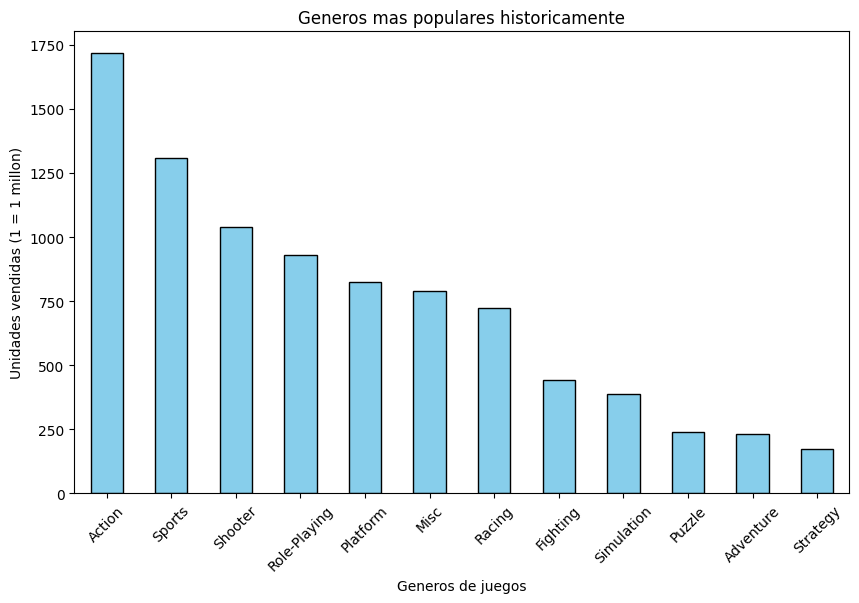

In [79]:
groupby_genre_full.plot(title='Generos mas populares historicamente', kind='bar', figsize=(10,6), 
                       x='genre', xlabel='Generos de juegos', ylabel='Unidades vendidas (1 = 1 millon)', 
                       color='skyblue', edgecolor='black', legend=False)
plt.xticks(rotation=45)
plt.show()

OBSERVACIONES

Historicamente parece que los generos mas populares (o rentables) son juegos de Accion, Deportes y Disparos. Un poco mas abajo se encuentras los juegos de Rol, Plataformas, Miscelanea y Carreras. Aun tenemos que analizar si esta tendencia continua cuando analizamos unicamente periodos de tiempo mas recientes, es decir, plataformas mas modernas.

In [80]:
# Agrupar por genero: Generacion Xbox 360 y PS3
groupby_genre_x360_ps3 = x360_ps3_games.groupby('genre')['ventas_totales'].sum().reset_index()

# Ordenar y mostrar resultados
print('Generos mas populares de la generacion de Xbox 360 y PS3 (7th generacion de consolas)')
groupby_genre_x360_ps3 = groupby_genre_x360_ps3.sort_values('ventas_totales', ascending=False)
groupby_genre_x360_ps3

Generos mas populares de la generacion de Xbox 360 y PS3 (7th generacion de consolas)


,genre,ventas_totales
0,Action,534.58
8,Shooter,467.91
10,Sports,269.83
7,Role-Playing,145.04
6,Racing,135.44
3,Misc,133.88
2,Fighting,88.43
4,Platform,40.61
1,Adventure,37.17
9,Simulation,24.17


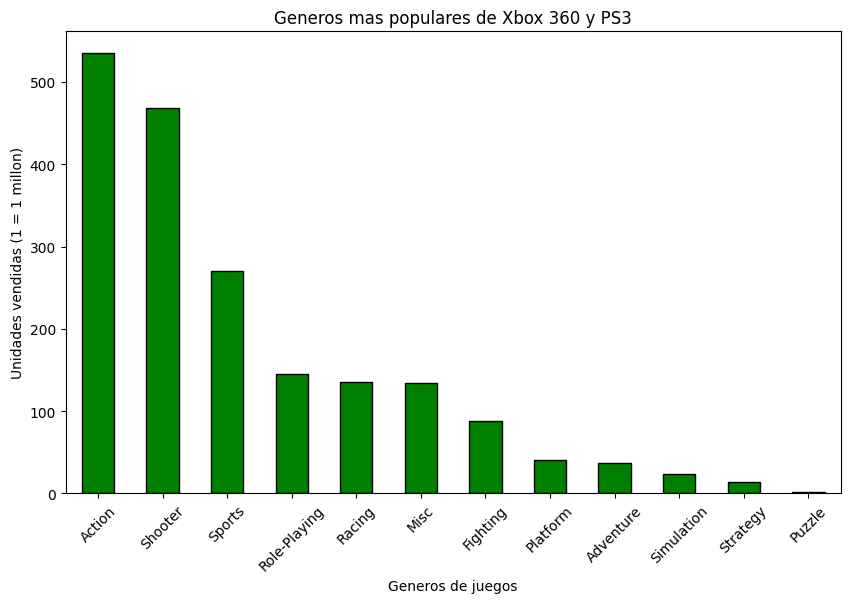

In [81]:
groupby_genre_x360_ps3.plot(title='Generos mas populares de Xbox 360 y PS3', kind='bar', figsize=(10,6), 
                       x='genre', xlabel='Generos de juegos', ylabel='Unidades vendidas (1 = 1 millon)', 
                       color='green', edgecolor='black', legend=False)
plt.xticks(rotation=45)
plt.show()

OBSERVACIONES

Para las consolas Xbox 360 y PS3 parece que tambien continua la tendencia de general de juegos mas populares. Por un margen considerable los generos mas populares son los juegos de Accion y Disparos, y en este caso un tramo mas abajo se encuentran los juegos de Deportes y el resto con ventas menores, pero aun asi que deben tomarse en consideracion pues se cuentan por millones todavia.

In [82]:
# Agrupar por genero: Generacion PS4 y Xbox One
groupby_genre_ps4_xone = ps4_xone_games.groupby('genre')['ventas_totales'].sum().reset_index()

# Ordenar y mostrar resultados
print('Generos mas populares de la generacion de Xbox One y PS4 (8th generacion de consolas) hasta ahora.')
groupby_genre_ps4_xone = groupby_genre_ps4_xone.sort_values('ventas_totales', ascending=False)
groupby_genre_ps4_xone

Generos mas populares de la generacion de Xbox One y PS4 (8th generacion de consolas) hasta ahora.


,genre,ventas_totales
8,Shooter,148.89
0,Action,133.41
10,Sports,82.35
7,Role-Playing,39.54
6,Racing,21.93
3,Misc,15.62
2,Fighting,11.10
1,Adventure,9.02
4,Platform,8.62
9,Simulation,1.92


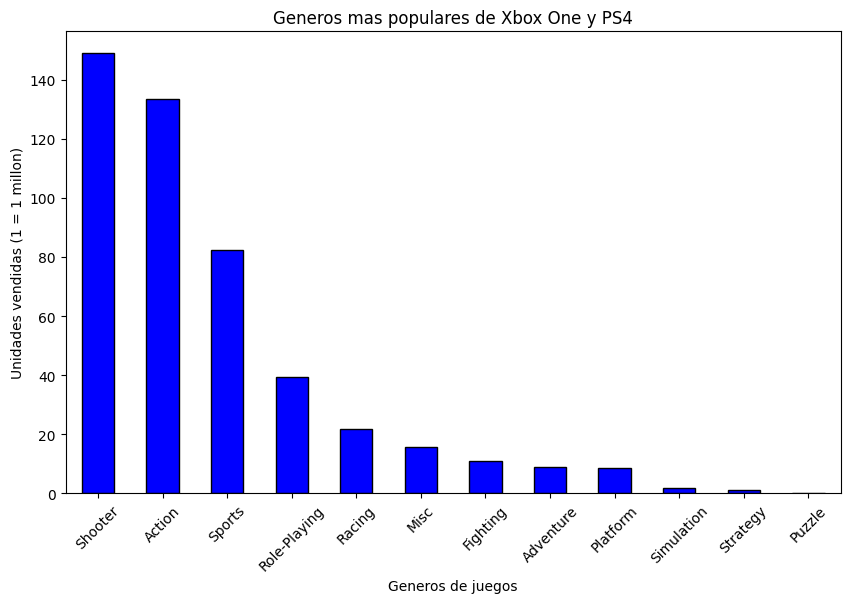

In [83]:
groupby_genre_ps4_xone.plot(title='Generos mas populares de Xbox One y PS4', kind='bar', figsize=(10,6), 
                       x='genre', xlabel='Generos de juegos', ylabel='Unidades vendidas (1 = 1 millon)', 
                       color='blue', edgecolor='black', legend=False)
plt.xticks(rotation=45)
plt.show()

OBSERVACIONES

De forma consistente podemos observar de las graficas y tablas anteriores que los 3 generos mas populares son los juegos de 'Action', 'Shooter' y 'Sports'. Un margen mas abajo encontramos que los videojuegos de 'Role-playing' y 'Racing' tambien gozan de cierta popularidad. Los generos restantes suelen considerarse de 'nicho' dada su menor popularidad en especial juegos de 'Similation', 'Strategy' y 'Puzzle'.

# Paso 4. Crea un perfil de usuario para cada región

Para esta parte del analisis vamos a filtrar por las 3 regiones principales en ventas: NA (Norte America), EU (Europa) y JP (Japon). Para esto vamos a filtrar para que las ventas de cada region sean mayores a cero, asi descartamos los juegos que no tuvieron ventas en esa region o que simplemente no fueron publicados en esa region (como a veces suele suceder con titulos provenientes de Japon).

Luego vamos a agrupar por plataformas para cada region y calcular las ventas asociadas a esas plataformas para determinar cuales han sido y son las mas populares por region.

Tambien vamos a agrupar por generos de juego y calcular las ventas asociadas a cada genero, para que de esta forma podamos observar cuales son los generos mas populares por region.

Finalmente vamos a agrupar por rating (clasificacion de la ESRB) y calcular las ventas asociadas por rating y observar si esto afecta o es determinante para las ventas en regiones individuales.

## Region de NA (Norte America)

In [84]:
# Filtrar juegos con ventas en la region de NA
na_games = games_limpios[games_limpios['na_sales'] > 0 ]

# Mostrar estadisticas generales para la region de NA
na_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,ventas_totales
count,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,7366.000000,6784.000000,11995.000000
mean,2006.143810,0.361936,0.193165,0.065581,0.063516,68.705267,7.119325,0.684197
std,5.643728,0.939536,0.584038,0.332685,0.217351,14.027590,1.505755,1.795962
min,1980.000000,0.010000,0.000000,0.000000,0.000000,13.000000,0.000000,0.010000
25%,2003.000000,0.060000,0.010000,0.000000,0.010000,60.000000,6.400000,0.100000
50%,2007.000000,0.140000,0.040000,0.000000,0.020000,70.000000,7.500000,0.250000
75%,2010.000000,0.340000,0.160000,0.000000,0.050000,79.000000,8.200000,0.630000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.600000,82.540000


In [85]:
# Agrupar por plataforma y calcular ventas en la region de NA
groupby_platform_na = na_games.groupby('platform')['na_sales'].sum().reset_index()

# Top 5 Plataformas mas populares en NA
na_top_5_platforms = groupby_platform_na.sort_values('na_sales', ascending=False).head(5)
print("Top 5 Plataformas mas populares en NA")
na_top_5_platforms

Top 5 Plataformas mas populares en NA


,platform,na_sales
22,X360,595.74
12,PS2,572.92
20,Wii,486.87
13,PS3,390.13
3,DS,380.31


In [86]:
# Filtrar datos mayores al año 2012
filter_na_games_2013 = na_games[na_games['year_of_release'] > 2012]

# Agrupar por plataforma y sumar las ventas de la region de NA
groupby_na_games_2013 = filter_na_games_2013.groupby('platform')['na_sales'].sum().reset_index()

# Top 5 Plataformas mas populares en NA a partir de 2013
na_top_5_platforms_2013 = groupby_na_games_2013.sort_values('na_sales', ascending=False).head(5)
print("Top 5 Plataformas mas populares en NA a partir de 2013:")
na_top_5_platforms_2013

Top 5 Plataformas mas populares en NA a partir de 2013:


,platform,na_sales
4,PS4,108.74
9,XOne,93.12
8,X360,81.66
3,PS3,63.50
0,3DS,38.20


In [87]:
# Agrupar por generos mas populares en la region de NA
groupby_genre_na = na_games.groupby('genre')['na_sales'].sum().reset_index()

# Top 5 generos mas populares en la region de NA
na_top_5_genres = groupby_genre_na.sort_values('na_sales', ascending=False).head(5)
print("Top 5 Generos mas populares en NA")
na_top_5_genres

Top 5 Generos mas populares en NA


,genre,na_sales
0,Action,863.17
10,Sports,671.20
8,Shooter,584.83
4,Platform,444.44
3,Misc,399.57


In [88]:
# Generos mas populares a partir de 2013
# Agrupar por genero y sumar las ventas de la region de NA
groupby_genre_na_2013 = filter_na_games_2013.groupby('genre')['na_sales'].sum().reset_index()

# Top 5
na_top_5_genres_2013 = groupby_genre_na_2013.sort_values('na_sales', ascending=False).head(5)
print("Top 5 Generos mas populares en NA a partir de 2013")
na_top_5_genres_2013

Top 5 Generos mas populares en NA a partir de 2013


,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [89]:
# Por clasificaiones de la ESRB
# Agrupar por rating y sumar las ventas de la region de NA
groupby_rating_na = na_games.groupby('rating')['na_sales'].sum().reset_index()

# Top 5 ventas de juegos ordenados por rating en la region de NA
na_top_5_rating = groupby_rating_na.sort_values('na_sales', ascending=False).head(5)
print('Top 5 ventas de juegos ordenados por rating en la region de NA')
na_top_5_rating

Top 5 ventas de juegos ordenados por rating en la region de NA


,rating,na_sales
1,E,1274.24
6,RP,1225.84
7,T,747.60
5,M,742.89
2,E10+,345.50


In [90]:
# Por clasificaiones de la ESRB a partir de 2013
# Agrupar por rating y sumar las ventas de la region de NA a partir de 2013
groupby_rating_na_2013 = filter_na_games_2013.groupby('rating')['na_sales'].sum().reset_index()

# Top 5 ventas de juegos ordenados por rating en la region de NA a partir de 2013
na_top_5_rating_2013 = groupby_rating_na_2013.sort_values('na_sales', ascending=False).head(5)
print('Top 5 ventas de juegos ordenados por rating en la region de NA a partir de 2013')
na_top_5_rating_2013

Top 5 ventas de juegos ordenados por rating en la region de NA a partir de 2013


,rating,na_sales
2,M,165.21
3,RP,89.42
0,E,79.05
1,E10+,54.24
4,T,49.79


OBSERVACIONES PARA LA REGION DE NA

Las cinco plataformas principales: Historicamente las plataformas mas popluares de NA son (en orden decendente) Xbox 360, PS2, Wii, PS3  y Nintendo DS. Sin embargo, las cinco plataformas mas populares a partir de 2013 hasta 2016 son PS4, Xbox One, Xbox 360, PS3 y Nintendo 3DS.

Los cinco generos principales: Historicamente los generos mas populares en la region de NA son (en orden decendente) Action, Sports, Shooter, Platform y Misc (este ultimo es una mezcla de varias generos). Por otro lado, desde 2013 hasta 2016 los generos mas populares fueron Action, Shooter, Sports, Role-playing y Misc.

En cuanto al rating (clasificaciones de la ESRB), los juegos con clasificaion E son los mas vendidos historicamente, seguido de los RP (juegos sin clasificacion) y despues los juegos T y muy cerca los juegos M dejando al final a los juegos E10+. Pero cuando tomamos en cuenta solo el periodo comprendido de 2013 a 2016 la tendencia cambia. Los juegos M (Mature) son los mas populares seguidos de los RP, E, E10+ y al final los juegos T (Teen).

Por lo anterior no parece que la clasificacion de un videojuego afecte de manera directa las ventas del mismo, al menos en la region de NA.

## Region de EU (Europa)



In [91]:
# Filtrar juegos con ventas en la region de EU
eu_games = games_limpios[games_limpios['eu_sales'] > 0 ]

# Mostrar estadisticas generales para la region de EU
eu_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,ventas_totales
count,10677.000000,10677.000000,10677.000000,10677.000000,10677.000000,6725.000000,6393.000000,10677.000000
mean,2006.082139,0.377530,0.224751,0.070352,0.068620,70.269591,7.200375,0.741254
std,5.948566,0.991871,0.614608,0.343681,0.223715,13.461538,1.447751,1.890712
min,1980.000000,0.000000,0.010000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2003.000000,0.050000,0.020000,0.000000,0.010000,62.000000,6.500000,0.100000
50%,2007.000000,0.140000,0.070000,0.000000,0.020000,72.000000,7.500000,0.270000
75%,2010.000000,0.360000,0.200000,0.000000,0.060000,80.000000,8.300000,0.710000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [92]:
# Agrupar por plataforma y calcular ventas en la region de EU
groupby_platform_eu = eu_games.groupby('platform')['eu_sales'].sum().reset_index()

# Top 5 Plataformas mas populares en EU
eu_top_5_platforms = groupby_platform_eu.sort_values('eu_sales', ascending=False).head(5)
print("Top 5 Plataformas mas populares en EU")
eu_top_5_platforms

Top 5 Plataformas mas populares en EU


,platform,eu_sales
12,PS2,332.63
13,PS3,327.20
22,X360,268.32
20,Wii,258.32
11,PS,212.39


In [93]:
# Filtrar datos mayores al año 2012
filter_eu_games_2013 = eu_games[eu_games['year_of_release'] > 2012]

# Agrupar por plataforma y sumar las ventas de la region de EU
groupby_eu_games_2013 = filter_eu_games_2013.groupby('platform')['eu_sales'].sum().reset_index()

# Top 5 Plataformas mas populares en EU a partir de 2013
eu_top_5_platforms_2013 = groupby_eu_games_2013.sort_values('eu_sales', ascending=False).head(5)
print("Top 5 Plataformas mas populares en EU a partir de 2013:")
eu_top_5_platforms_2013

Top 5 Plataformas mas populares en EU a partir de 2013:


,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


In [94]:
# Agrupar por generos mas populares en la region de EU
groupby_genre_eu = eu_games.groupby('genre')['eu_sales'].sum().reset_index()

# Top 5 generos mas populares en la region de EU
eu_top_5_genres = groupby_genre_eu.sort_values('eu_sales', ascending=False).head(5)
print("Top 5 Generos mas populares en EU")
eu_top_5_genres

Top 5 Generos mas populares en EU


,genre,eu_sales
0,Action,510.99
10,Sports,371.32
8,Shooter,314.52
6,Racing,234.49
3,Misc,210.60


In [95]:
# Generos mas populares a partir de 2013
# Agrupar por genero y sumar las ventas de la region de EU
groupby_genre_eu_2013 = filter_eu_games_2013.groupby('genre')['eu_sales'].sum().reset_index()

# Top 5
eu_top_5_genres_2013 = groupby_genre_eu_2013.sort_values('eu_sales', ascending=False).head(5)
print("Top 5 Generos mas populares en EU a partir de 2013")
eu_top_5_genres_2013

Top 5 Generos mas populares en EU a partir de 2013


,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [96]:
# Por clasificaiones de la ESRB
# Agrupar por rating y sumar las ventas de la region de EU
groupby_rating_eu = eu_games.groupby('rating')['eu_sales'].sum().reset_index()

# Top 5 ventas de juegos ordenados por rating en la region de EU
eu_top_5_rating = groupby_rating_eu.sort_values('eu_sales', ascending=False).head(5)
print('Top 5 ventas de juegos ordenados por rating en la region de EU')
eu_top_5_rating

Top 5 ventas de juegos ordenados por rating en la region de EU


,rating,eu_sales
1,E,703.86
6,RP,609.68
5,M,480.00
7,T,421.79
2,E10+,183.35


In [97]:
# Por clasificaiones de la ESRB a partir de 2013
# Agrupar por rating y sumar las ventas de la region de EU a partir de 2013
groupby_rating_eu_2013 = filter_eu_games_2013.groupby('rating')['eu_sales'].sum().reset_index()

# Top 5 ventas de juegos ordenados por rating en la region de EU a partir de 2013
eu_top_5_rating_2013 = groupby_rating_eu_2013.sort_values('eu_sales', ascending=False).head(5)
print('Top 5 ventas de juegos ordenados por rating en la region de EU a partir de 2013')
eu_top_5_rating_2013

Top 5 ventas de juegos ordenados por rating en la region de EU a partir de 2013


,rating,eu_sales
2,M,145.32
0,E,83.36
3,RP,78.91
1,E10+,42.69
4,T,41.95


OBSERVACIONES PARA LA REGION DE EU

Las cinco plataformas principales: Historicamente, las plataformas mas populares en la region de EU son PS2, PS3, Xbox 360, Wii y PS. Pero a partir del año 2013, las plataformas mas populares son PS4, PS3, Xbox One, Xbox 360 y Nintendo 3DS.

Los cinco generos principales: Los generos mas populares siguen una tendencia similar a la regionde NA. En Eu estos generos son juegos de Accion, Deportes y Disparos, seguidos por juegos de Carreras y juegos de rol.

De forma general parece que la clasificacion de juegos no afecta las ventas en la regionde EU. En el periodo de 2013-2016 los juegos mas vendidos son los de clasificacion M (Mature), seguido de E (Everyone) y RP.

## Region de JP (Japon)



In [98]:
# Filtrar juegos con ventas en la region de JP
jp_games = games_limpios[games_limpios['jp_sales'] > 0 ]

# Mostrar estadisticas generales para la region de JP
jp_games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,ventas_totales
count,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,2079.000000,2104.000000,6144.000000
mean,2006.706217,0.357845,0.223454,0.210065,0.073813,74.675325,7.526521,0.865177
std,6.672823,1.259549,0.776751,0.481057,0.291085,11.794883,1.164383,2.420105
min,1983.000000,0.000000,0.000000,0.010000,0.000000,32.000000,1.700000,0.010000
25%,2003.000000,0.000000,0.000000,0.030000,0.000000,68.000000,7.000000,0.050000
50%,2008.000000,0.000000,0.000000,0.070000,0.000000,76.000000,7.800000,0.190000
75%,2012.000000,0.230000,0.120000,0.190000,0.040000,83.000000,8.300000,0.732500
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.600000,82.540000


In [99]:
# Agrupar por plataforma y calcular ventas en la region de JP
groupby_platform_jp = jp_games.groupby('platform')['jp_sales'].sum().reset_index()

# Top 5 Plataformas mas populares en JP
jp_top_5_platforms = groupby_platform_jp.sort_values('jp_sales', ascending=False).head(5)
print("Top 5 Plataformas mas populares en JP")
jp_top_5_platforms

Top 5 Plataformas mas populares en JP


,platform,jp_sales
3,DS,175.02
14,PS,139.78
15,PS2,137.54
22,SNES,116.55
1,3DS,100.62


In [100]:
# Filtrar datos mayores al año 2012
filter_jp_games_2013 = jp_games[jp_games['year_of_release'] > 2012]

# Agrupar por plataforma y sumar las ventas de la region de JP
groupby_jp_games_2013 = filter_jp_games_2013.groupby('platform')['jp_sales'].sum().reset_index()

# Top 5 Plataformas mas populares en JP a partir de 2013
jp_top_5_platforms_2013 = groupby_jp_games_2013.sort_values('jp_sales', ascending=False).head(5)
print("Top 5 Plataformas mas populares en JP a partir de 2013:")
jp_top_5_platforms_2013

Top 5 Plataformas mas populares en JP a partir de 2013:


,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
4,PSV,18.59
2,PS4,15.96
6,WiiU,10.88


In [101]:
# Agrupar por generos mas populares en la region de JP
groupby_genre_jp = jp_games.groupby('genre')['jp_sales'].sum().reset_index()

# Top 5 generos mas populares en la region de JP
jp_top_5_genres = groupby_genre_jp.sort_values('jp_sales', ascending=False).head(5)
print("Top 5 Generos mas populares en JP")
jp_top_5_genres

Top 5 Generos mas populares en JP


,genre,jp_sales
7,Role-Playing,353.39
0,Action,160.14
10,Sports,134.93
4,Platform,130.71
3,Misc,107.02


In [102]:
# Generos mas populares a partir de 2013
# Agrupar por genero y sumar las ventas de la region de JP
groupby_genre_jp_2013 = filter_jp_games_2013.groupby('genre')['jp_sales'].sum().reset_index()

# Top 5
jp_top_5_genres_2013 = groupby_genre_jp_2013.sort_values('jp_sales', ascending=False).head(5)
print("Top 5 Generos mas populares en JP a partir de 2013")
jp_top_5_genres_2013

Top 5 Generos mas populares en JP a partir de 2013


,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


In [103]:
# Por clasificaiones de la ESRB
# Agrupar por rating y sumar las ventas de la region de JP
groupby_rating_jp = jp_games.groupby('rating')['jp_sales'].sum().reset_index()

# Top 5 ventas de juegos ordenados por rating en la region de JP
jp_top_5_rating = groupby_rating_jp.sort_values('jp_sales', ascending=False).head(5)
print('Top 5 ventas de juegos ordenados por rating en la region de JP')
jp_top_5_rating

Top 5 ventas de juegos ordenados por rating en la region de JP


,rating,jp_sales
4,RP,836.74
0,E,197.96
5,T,150.70
3,M,63.58
1,E10+,40.20


In [104]:
# Por clasificaiones de la ESRB a partir de 2013
# Agrupar por rating y sumar las ventas de la region de JP a partir de 2013
groupby_rating_jp_2013 = filter_jp_games_2013.groupby('rating')['jp_sales'].sum().reset_index()

# Top 5 ventas de juegos ordenados por rating en la region de JP a partir de 2013
jp_top_5_rating_2013 = groupby_rating_jp_2013.sort_values('jp_sales', ascending=False).head(5)
print('Top 5 ventas de juegos ordenados por rating en la region de JP a partir de 2013')
jp_top_5_rating_2013

Top 5 ventas de juegos ordenados por rating en la region de JP a partir de 2013


,rating,jp_sales
3,RP,85.05
4,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


OBSERVACIONES PARA LA REGION DE JP

Las cinco plataformas principales: La region de JP muestra tendencia diferentes respecto a NA y EU. Las plataformas mas populares historicamente son Nintendo DS, PS, PS2, SNES y Nintendo 3DS. En el periodo de 2013-2016 las plataformas mas populares son Nintendo 3DS, PS3, PSV, PS4 y Wii U.

Los cinco generos principales: Los generos mas populares en Japon son los juegos de Rol, Accion, Deportes y Plataformas. La tendencia es similar cuando vemos los datos del periodo de 2013-2016, donde los juegos de rol siguen siendo preferidos, seguido de los juegos de accion, miscelanea, juegos de peleas y disparos al final.

Segun los datos para las clasificaciones de juegos, en japon parece algo distinta la tendencia comparada con NA y EU. Los juegos sin clasificacion (RP) paracen mas populares, luego los juegos E y T, y al final los juegos M y E10+.

# Paso 5. Pruebas de hipotesis

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

## Prueba de hipotesis 1: Las calificaiones de juegos de Xbox One y PC son iguales

Vamos a comprobar la hipotesis de que las calificaciones promedio de los usuarios para las plataformas de Xbox One y PC son las mismas. Es decir, es este caso la hipotesis nula seria:

HIPOTESIS NULA: La media de las calificaiones de juegos de Xbox One y PC son iguales.

HIPOTESIS ALTERNATIVA: La media de las calificaciones de juegos de Xbox One y PC son diferentes.

Vamos a establecer el valor alfa en 5%.

Para este caso vamos a realizar una prueba T de dos muestras independientes (ttest_ind).

In [105]:
# Filtrar juegos a partir de 2013
filter_games_after_2012 = games_limpios[games_limpios['year_of_release'] > 2012]

# Filtrar juegos de Xbox One
filter_xone_games = filter_games_after_2012[filter_games_after_2012['platform'] == 'XOne']

# Descartar valores ausentes
filter_xone_games = filter_xone_games.dropna(subset=['user_score'])

# Agrupar por plataform y calcular promedio
groupby_xone_games_score = filter_xone_games.groupby('name')['user_score'].mean().reset_index()

# Promedio de user_score para Xbox One
print(f"Prodedio de juegos en Xbox One: {groupby_xone_games_score['user_score'].mean()} \n")

# Media, varianza y desviacion estandar para XOne
print('Media, varianza y desviacion estandar para Xbox One')
groupby_xone_games_score['user_score'].agg(['mean', 'var', 'std'])

Prodedio de juegos en Xbox One: 6.521428571428572 

Media, varianza y desviacion estandar para Xbox One


mean    6.521429
var     1.906997
std     1.380941
Name: user_score, dtype: float64

In [106]:
# Filtrar juegos de PC
filter_pc_games = filter_games_after_2012[filter_games_after_2012['platform'] == 'PC']

# Descartar valores ausentes
filter_pc_games = filter_pc_games.dropna(subset=['user_score'])

# Agrupar por plataform y calcular promedio
groupby_pc_games_score = filter_pc_games.groupby('name')['user_score'].mean().reset_index()

# Promedio de user_score para PC
print(f"Prodedio de juegos en PC: {groupby_pc_games_score['user_score'].mean()} \n")

# Media, varianza y desviacion estandar para PC
print('Media, varianza y desviacion estandar para PC: ')
groupby_pc_games_score['user_score'].agg(['mean', 'var', 'std'])

Prodedio de juegos en PC: 6.269677419354839 

Media, varianza y desviacion estandar para PC: 


mean    6.269677
var     3.035893
std     1.742381
Name: user_score, dtype: float64

In [107]:
# Prueba de hipotesis 1

# Promedio de juegos en Xbox One
print(f"Prodedio de juegos en Xbox One: {groupby_xone_games_score['user_score'].mean()}")

# Promedio de juegos en PC
print(f"Prodedio de juegos en PC: {groupby_pc_games_score['user_score'].mean()} \n")

# Prueba estadistica ttest_ind
alpha = 0.05

results = st.ttest_ind(groupby_xone_games_score['user_score'], groupby_pc_games_score['user_score'])

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Prodedio de juegos en Xbox One: 6.521428571428572
Prodedio de juegos en PC: 6.269677419354839 

valor p: 0.14012658403611503
No podemos rechazar la hipótesis nula


OBSERVACIONES

De acuerdo a la prueba de hipotesis realizada, el valor P es de poco mas de 14% entre las 2 muestras que tomamos. Es nos sugiere que NO podemos rechazar la hipotesis nula, ya que la media de ambas muestras es muy similar. Para juegos de Xbox One es 6.5 y para juegos de PC es 6.2, numeros muy proximos en realidad.

## Prueba de hipotesis 2: Las calificaciones promedio para los géneros de Acción y Deportes son diferentes.

La segunda prueba de hipotesis que vamos a comprobar es si las calificaciones promedio de los usuarios para los generos de Accion y Deportes son diferentes. En otras palabras, la hipotesis nula y la hipotesis altenativa serian:

HIPOTESIS NULA: Las calificaciones promedio de los usuarios para juegos de Accion y Deportes son igual.

HIPOTESIS ALTERNATIVA: Las calificaciones promedio de los usuarios para juegos de Accion y Deportes son diferentes.

De igual forma que en la prueba anterior vamos a definir el umbral del valor alfa en 5% y vamos a realizar una prueba T para dos muestras independientes (ttest_ind), dado que nuestras muestras son precisamente independientes y generos completamente distintos.

In [108]:
# Filtrar juegos de accion
action_games = games_limpios[games_limpios['genre'] == 'Action']

# Descartar valores ausentes de la columna user_score
action_games = action_games.dropna(subset=['user_score'])

# Agrupar por juegos de accion y calular promedio
groupby_action_games = action_games.groupby('name')['user_score'].mean().reset_index()

# Media, varianza y desviacion estandar para juegos de Accion
print('Media, varianza y desviacion estandar para juegos de Accion')
groupby_action_games['user_score'].agg(['mean', 'var', 'std'])

Media, varianza y desviacion estandar para juegos de Accion


mean    7.143871
var     1.899807
std     1.378335
Name: user_score, dtype: float64

In [109]:
# Filtrar juegos de deportes
sport_games = games_limpios[games_limpios['genre'] == 'Sports']

# Descartar valores ausentes de la columna user_score
sport_games = sport_games.dropna(subset=['user_score'])

# Agrupar por juegos de accion y calular promedio
groupby_sport_games = sport_games.groupby('name')['user_score'].mean().reset_index()

# Media, varianza y desviacion estandar para juegos de Deportes
print('Media, varianza y desviacion estandar para juegos de Deportes')
groupby_sport_games['user_score'].agg(['mean', 'var', 'std'])

Media, varianza y desviacion estandar para juegos de Deportes


mean    7.037052
var     2.322716
std     1.524046
Name: user_score, dtype: float64

In [110]:
# Prueba de hipotesis 2

# Promedio de juegos de Accion
print(f"Prodedio de juegos de Accion: {groupby_action_games['user_score'].mean()}")

# Promedio de juegos de Deportes
print(f"Prodedio de juegos de Deportes: {groupby_sport_games['user_score'].mean()} \n")

# Prueba estadistica ttest_ind
alpha = 0.05

results = st.ttest_ind(groupby_action_games['user_score'], groupby_sport_games['user_score'])

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Prodedio de juegos de Accion: 7.143871319520174
Prodedio de juegos de Deportes: 7.037052363380776 

valor p: 0.16943875980976414
No podemos rechazar la hipótesis nula


OBSERVACIONES

Despues de realizar la prueba de la segunda hipotesis podemos observar que no podemos rechazar la hipotesis nula que dice que las calificaiones promedio de los usuarios para juegos de Accion y Deportes son iguales. Un valor P del 16.9% nos indica que la media de calificaciones promedio para las muestras independientes que tenemos son muy parecidas. En particular, los juegos de accion tienen un promedio de calificacion de 7.14, mientras que los juegos de deportes tienen 7.03.

En ambas pruebas de hipotesis no podemos rechazar la hipotesis nula.

Ademas, haciendo una reflexion rapida podemos inferir que para ambas plataformas, Xbox One y PC, se publican casi los mismos titulos por lo que cabe esperar que las calificaciones de esos juegos no difieran tanto de una plataforma a otra.

No podemos decir lo mismo en el caso de las calificaciones para juegos de accion y deportes. Son juegos completamente diferentes pero paracen tener un nivel de aprobacion similar para los usuarios que los consumen. 

# Paso 6. Conclusiones

El objetivo este proyecto fue identificar los patrones que determinan que juegos son exitosos y cuales no, en base a los datos proporcionados por la tienda online Ice que vende juegos por todo el mundo.

REVISION DE LOS DATOS

En este ocasion trabajamos con un unico dataframe que contiene datos como nombre de los juegos, plataforma del juego, año de lanzamiento, ventas por region (NA, EU y JP) y clasificacion de juego por edad. Fue necesario realizar una estandarizacion de nombre de columnas y cambiar el tipo de datos de algunas columnas numericas.

LIMPIEZA DE DATOS: PROCESAMIENTO DE VALORES AUSENTES

Hay que mencionar que nos encontramos con algunos problemas en cuanto a los valores ausentes. Algunos se pudieron resolver facilmente, pero la columna de 'year_of _release' 268 valores ausentes, todos de juegos diferentes. Muchos de estos valores ausentes pertenecian a plataformas mas antiguas por lo que deducimos que fueron juegos que se publicaron antes de 1994 aproximadamente. Debido a que nos interesaba analizar periodos de tiempo mas recientes y que no eran muchos datos, pues porcentualmente representaban solo un 1.6% del total, decidimos descartar estos datos. Despues de lo cual teniamos 16443 datos (casi) limpios de un total inicial de 16711 datos, lo cual todavia representa una cantidad considerable para realizar nuestros analisis.

Sin embargo, encontramos que las columnas de critic y user score contenian aun mas valores ausentes, 51.33% y poco mas de 40.09% respectivamente. Esto representa una cantidad de datos ausentes bastante considerable, por cual decidimos dejar intactos esos valores ausentes. La razon es que aun podemos trabajar con esos datos mientras no se requiera el uso del puntaje critico y de usuarios. Ademas no consideramos rellenarlos con valores estadisticos como la media o la mediana ya que al representar un porcentaje tan alto de datos podriamos haber sesgado mucho aquellos analisis que usaran estos datos. En el caso de los analisis en base al critic y user score decidimos descartar esos valores ausentes, unica y exclusivamente para esa parte del analisis, por lo cual trabajamos con cerca de 7000 datos, que todavia representa una muestra significativa del total de nuestros datos.

CALCULAR VENTAS TOTALES

Para terminar de preparar los datos, calculamos las ventas totales (globales) para cada videojuego y lo añadimos como una columna al final del dataframe.

ANALISIS DE DATOS: PATRONES POR AÑO, PLATAFORMAS Y GENEROS

+Videojuegos lanzados por año

De acuerdo a nuestros datos, encontramos que a partir de 1994 (quiza un poco antes), la cantidad de juegos que se publicaban por año comenzo a incrementarse. De igual forma a partir de mediados de los años 90's las ventas de videojuegos comenzaron a despuntar, lo cual es consistente, se publicaban cada vez mas juegos y tambien se vendian mas.

+Plataformas mas populares

Historicamente las plataformas mas populares tambien han sido aquellas lanzadas despues mediados de los años 90's. En particular la PS2 ha sido la plataforma mas exitosa en terminos de ventas totales de videojuegos, seguida del Xbox 360, PS3, Wii, Nintendo DS y PS. 

+Modelo para 2017

Para esta parte del analisis tomamos datos de plataformas mas recientes y las seccionamos por periodos. En la industria de videojuegos se le llaman generaciones. Tomamos la generacion de Xbox 360 y PS3 y calculamos cuales son los juegos mas vendidos y que generos son los mas rentables. Y luego hicimos lo mismo pero con la generacion siguiente que son las pltaformas PS4 y Xbox One. Encontramos que los juegos que son consistentemente mas populares a lo largo de estos periodos, son los juegos de Accion, Deportes y Disparos, seguidos por los juegos de rol y miscelanea. Los juegos menos populares son aquellos de estrategia, simulacion y puzzles (acertijos).

Ademas las plataformas en auge para 2017 son precisamente las plataformas mas actuales, PS4, Xbox One y Nintendo 3DS.

COMO AFECTAN LAS RESEÑAS

En terminos de como afectan las reseñas de los criticos y usuarios, no parece haber una correlacion directa. Es verdad que encontramos ciertos titulos con calificaciones altas que tambien muestran altas ventas, pero habia otros juegos valorados con menor puntaje que tambien poseian altas ventas. Y de acuerdo a las metricas de calificacion por plataformas, aquellas plataformas mejor valoradas por puntaje promedio de sus juegos no suelen ser las mas redituables. En cambio las plataformas mas populares suelen tener puntajes medianos como la PS2 con 69/100 y la Xbox 360 tambien con 69/100.

DIFERENCIAS ENTRE REGIONES

Los resultados de esta parte del analisis fueron mas interesantes. Encontramos que en la region de NA y EU comparten preferencias en cuanto a plataformas de juegos y generos de juegos. Las plataformas mas populares en NA fueron aquellas de Playstation y Xbox, mientras que en la region de EU las plataformas de Playstation estan en la cima, seguidas de Xbox y luego las plataformas de Nintendo. En la region de Japon la historia es algo distinta, ya que las plataformas dominantes son aquellas de Nintendo y luego Playstation, y por lo que parece Xbox tiene poca presencia en esa region.

Los generos de juegos mas populares en las regiones de NA y EU son muy similares tambien, tienen preferencia por los juegos de Accion, Deportes y Disparos. Por otro lado la region de JP tiene preferencias distintas, ya que los juegos de rol se situan arriba en sus preferencias seguidos de juegos de Accion, Deportes, Plataformas y Peleas.

PRUEBAS DE HIPOTESIS

En las pruebas de hipotesis comparamos primeros las calificaciones de usuarios para las plataformas Xbox One y PC, queriamos determinar si son iguales o no. Encontramos que las calificaciones promedio de ambas plataformas son muy similares por lo que no pudimos rechachar la hipotesis nula.

Para segunda hipotesis debiamos probar si las calificaciones de los juegos de accion y juegos de deportes son son diferentes. Lo que encontramos fue interesante. Parace que en la preferencia de los usuarios ambos generos de juegos son bien valorados y tienen un promedio de calificaciones muy similar. Tras realizar la prueba de muestras independientes encontramos que la hipotesis nula sobre que las calificaciones son iguales tuvo que mantenerse. 